# **Exploratory Data Analysis**

tables: users, flights, hotels, and sessions after filtering ( after 4th of January 2023 with users more than 7 sessions)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Users**

In [ ]:
# importing data
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Datasets/master_project/'
df=path+'filtered_users.csv'
users=pd.read_csv(df)
print('shape',users.shape)
users.head()

Mounted at /content/drive
shape (5782, 11)


,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17


In [ ]:
users.info() # check null and also data type
# birth date is object and also the sign-up date
# we could make another feature for customer age from birth date and from sign up date the tenure till today

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5782 non-null   int64  
 1   birthdate         5782 non-null   object 
 2   gender            5782 non-null   object 
 3   married           5782 non-null   bool   
 4   has_children      5782 non-null   bool   
 5   home_country      5782 non-null   object 
 6   home_city         5782 non-null   object 
 7   home_airport      5782 non-null   object 
 8   home_airport_lat  5782 non-null   float64
 9   home_airport_lon  5782 non-null   float64
 10  sign_up_date      5782 non-null   object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 418.0+ KB


In [ ]:
users.describe() # for numerical features

,user_id,home_airport_lat,home_airport_lon
count,5782.000000,5782.000000,5782.000000
mean,547670.236077,38.449324,-94.158017
std,64035.394540,6.199542,18.070420
min,94883.000000,21.316000,-157.927000
25%,519413.750000,33.818000,-112.289250
50%,542279.500000,39.175000,-90.035000
75%,576215.500000,42.276000,-79.370000
max,844489.000000,61.251000,-63.499000


In [ ]:
users.duplicated().sum() # check duplicates


np.int64(0)

In [ ]:
users.isna().sum() # check null

,0
user_id,0
birthdate,0
gender,0
married,0
has_children,0
home_country,0
home_city,0
home_airport,0
home_airport_lat,0
home_airport_lon,0


In [ ]:
# prompt: value counts of columns that are bool type from users table

# Select boolean columns
bool_cols = users.select_dtypes(include=['bool']).columns

# Calculate value counts for each boolean column
for col in bool_cols:
  print(f"Value counts for {col}:\n{users[col].value_counts(normalize=True)}\n")


Value counts for married:
married
False    0.557938
True     0.442062
Name: proportion, dtype: float64

Value counts for has_children:
has_children
False    0.673815
True     0.326185
Name: proportion, dtype: float64



In [ ]:
# example of datetimes functions year, month,day,day_name(),quarter, dayofyear, dayofweek,day_name()
users['birthdate']=pd.to_datetime(users['birthdate'])
users['birthdate'].dt.month_name()
users['birthdate'].dt.month


,birthdate
0,5
1,8
2,11
3,9
4,11
...,...
5777,6
5778,12
5779,7
5780,7


In [ ]:
today = pd.Timestamp.today()
print('today:',today)
users['age']=today.year-users['birthdate'].dt.year
# or users['age']=(today-users['birthdate']).dt.days//365
users['birthday_dayofyear']=users['birthdate'].dt.dayofyear
users.head()

today: 2025-04-19 22:23:42.464044


,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,birthday_dayofyear
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15,41,147
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22,44,232
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27,49,313
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11,38,269
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17,30,313


In [ ]:
# new feature for tenure months
users['sign_up_date']=pd.to_datetime(users['sign_up_date'])
users['tenure_months']=(today-users['sign_up_date']).dt.days//30
users.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,age,birthday_dayofyear,tenure_months
0,531931,1984-05-26,F,False,False,usa,san jose,SJC,37.362,-121.929,2023-01-15,41,147,27
1,611065,1981-08-20,F,False,False,usa,los angeles,LAX,33.942,-118.408,2023-02-22,44,232,26
2,229330,1976-11-08,F,True,False,usa,colorado springs,COS,38.806,-104.700,2022-06-27,49,313,34
3,586762,1987-09-26,F,False,False,canada,montreal,YUL,45.468,-73.741,2023-02-11,38,269,26
4,536035,1995-11-09,M,False,False,usa,new york,LGA,40.777,-73.872,2023-01-17,30,313,27


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             5782 non-null   int64         
 1   birthdate           5782 non-null   datetime64[ns]
 2   gender              5782 non-null   object        
 3   married             5782 non-null   bool          
 4   has_children        5782 non-null   bool          
 5   home_country        5782 non-null   object        
 6   home_city           5782 non-null   object        
 7   home_airport        5782 non-null   object        
 8   home_airport_lat    5782 non-null   float64       
 9   home_airport_lon    5782 non-null   float64       
 10  sign_up_date        5782 non-null   datetime64[ns]
 11  age                 5782 non-null   int32         
 12  birthday_dayofyear  5782 non-null   int32         
 13  tenure_months       5782 non-null   int64       

# **Plots**

In [ ]:
# categorical columns from users
cat_cols=list(users.select_dtypes(include='object').columns)
print('cat_cols:',cat_cols)
# numerical columns
num_cols=list(users.select_dtypes(include='number').columns)
print('num_cols:',num_cols)


cat_cols: ['gender', 'home_country', 'home_city', 'home_airport']
num_cols: ['user_id', 'home_airport_lat', 'home_airport_lon', 'age', 'birthday_dayofyear', 'tenure_months']


**Categorical Columns**

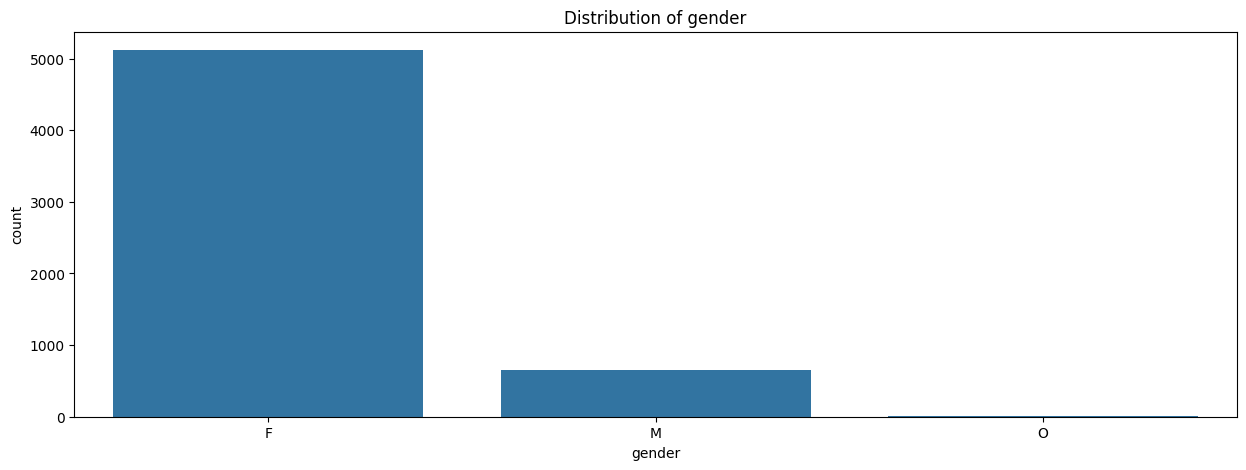

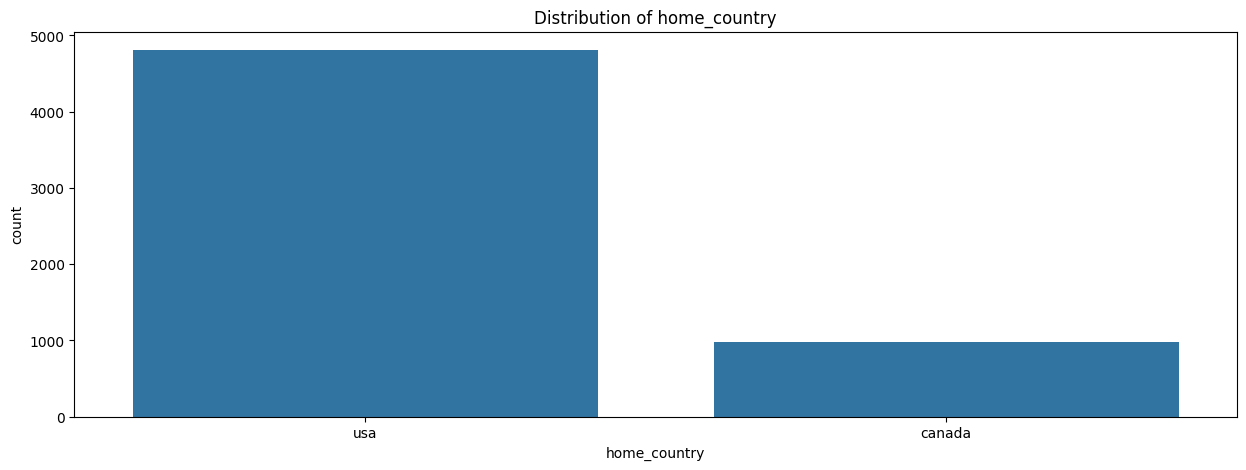

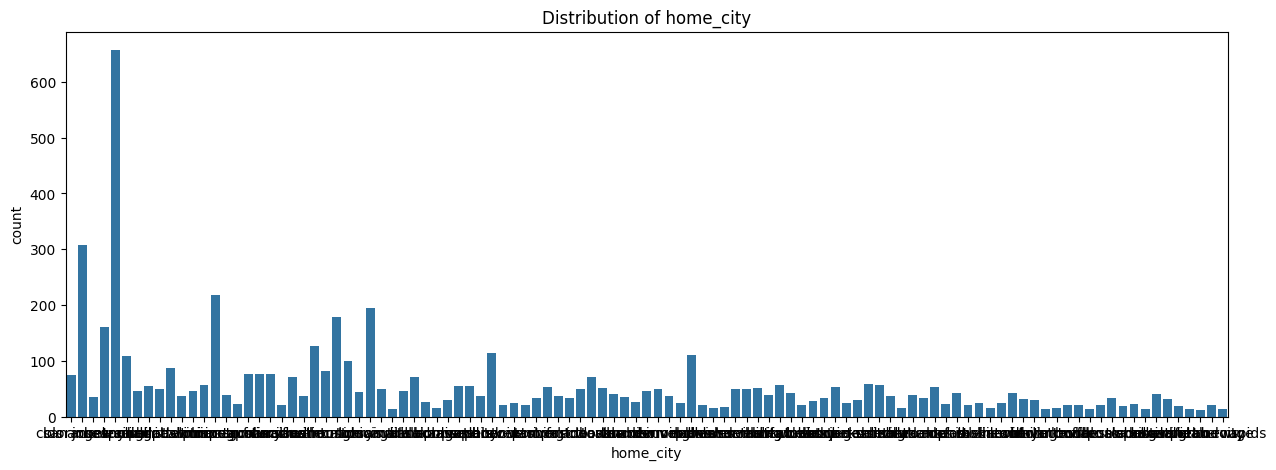

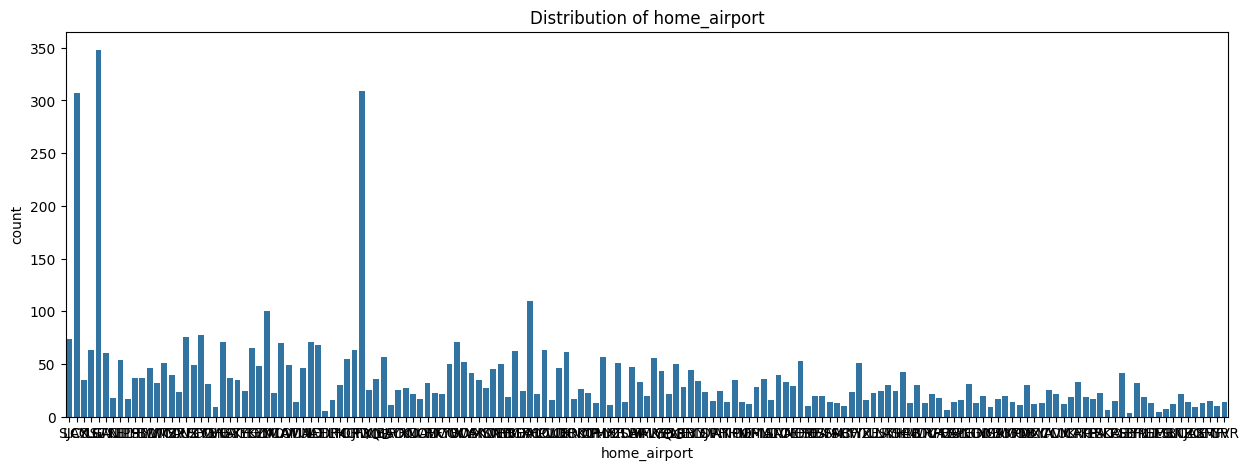

In [ ]:
for col in cat_cols:
  plt.figure(figsize=(15,5))
  sns.countplot(x=col,data=users)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

In [ ]:
# value counts of all cat_cols
for col in cat_cols:
  print('Value_counts of all categorical columns:\n',users[col].value_counts())
  print('\n')

Value_counts of all categorical columns:
 gender
F    5118
M     653
O      11
Name: count, dtype: int64


Value_counts of all categorical columns:
 home_country
usa       4808
canada     974
Name: count, dtype: int64


Value_counts of all categorical columns:
 home_city
new york          657
los angeles       307
toronto           218
chicago           194
houston           179
                 ... 
modesto            14
burlington         13
spokane            13
newport news       13
salt lake city     12
Name: count, Length: 105, dtype: int64


Value_counts of all categorical columns:
 home_airport
LGA    348
JFK    309
LAX    307
DAL    110
YYC    100
      ... 
POB      6
SKA      6
EDF      5
GEG      4
SFF      3
Name: count, Length: 159, dtype: int64




**Numerical Columns**

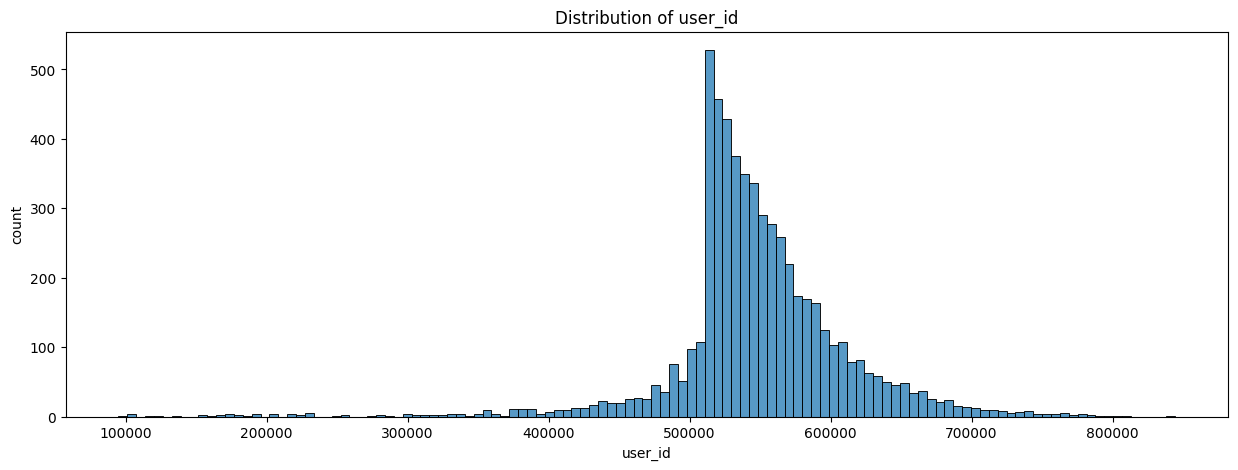

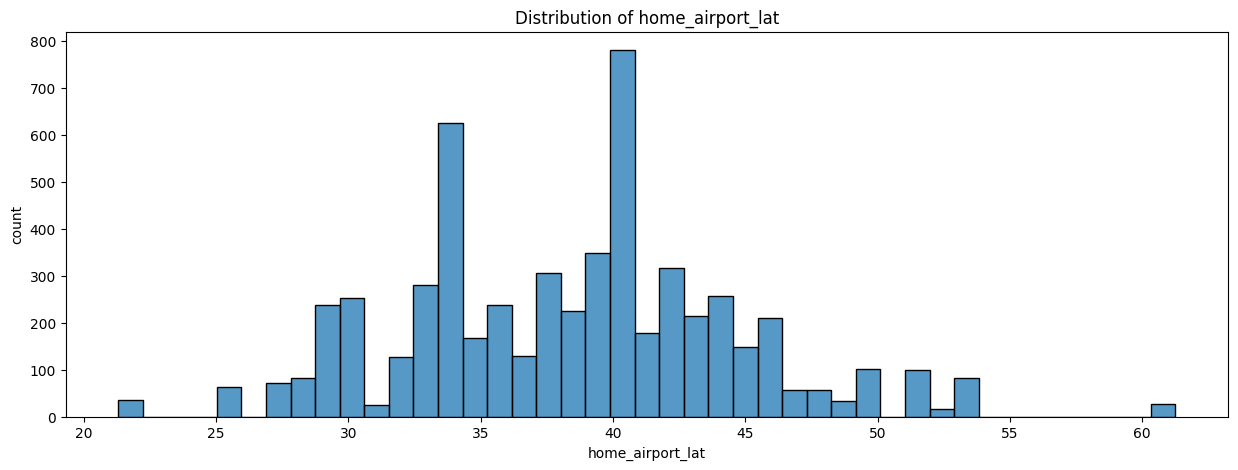

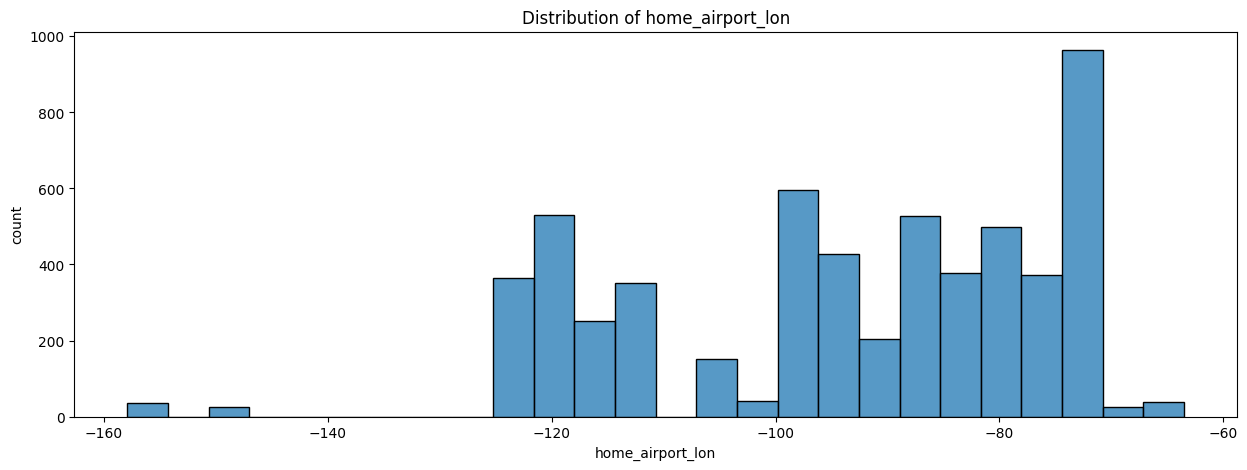

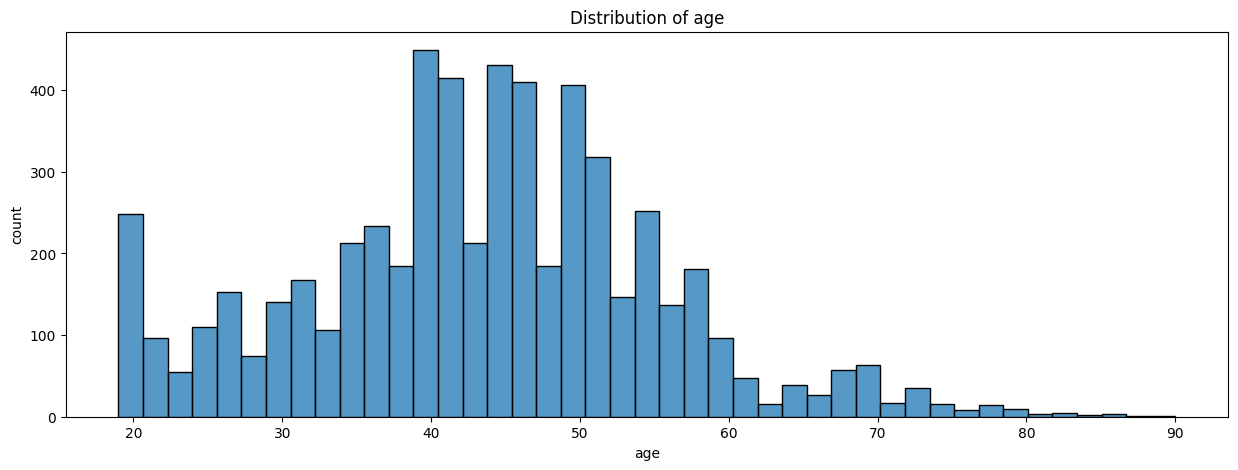

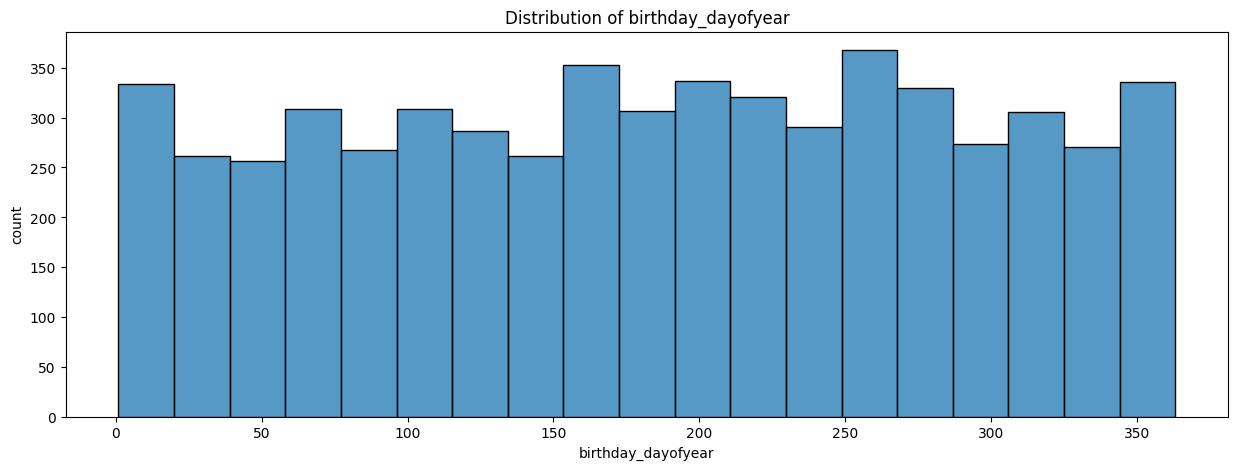

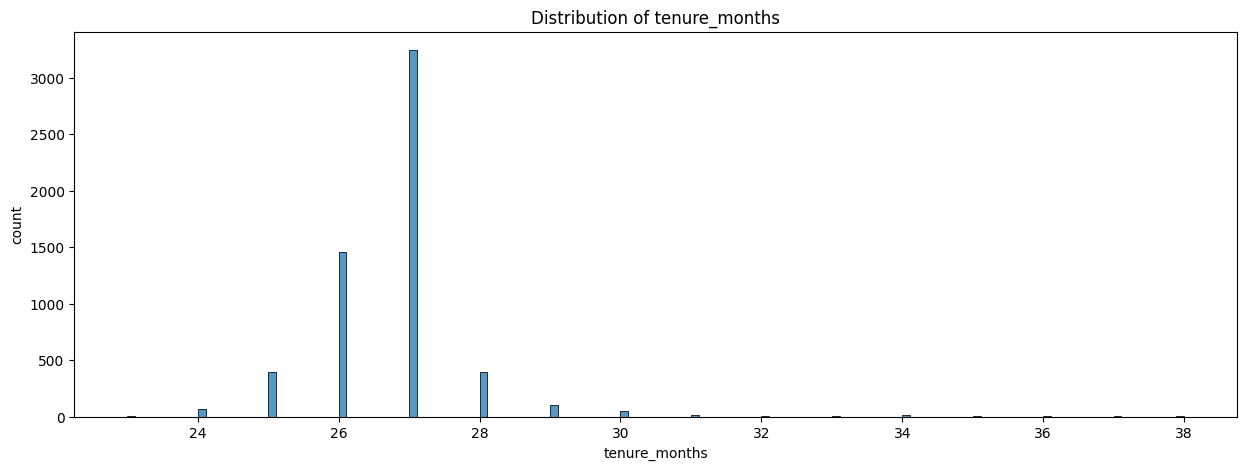

In [ ]:
# plot of all numerical columns
for col in num_cols:
  plt.figure(figsize=(15,5))
  sns.histplot(x=col,data=users)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

In [ ]:
print(users['tenure_months'].value_counts())
print(users['age'].value_counts())


tenure_months
27    3246
26    1456
25     397
28     394
29     106
24      64
30      52
34      15
31      15
35       9
32       9
36       5
38       4
23       4
37       3
33       3
Name: count, dtype: int64
age
40    245
42    220
44    216
19    216
45    215
     ... 
82      2
90      1
84      1
87      1
85      1
Name: count, Length: 70, dtype: int64


In [ ]:
print(users['age'].min())
print(users['age'].max())
users['age'].value_counts(normalize=True)

19
90


,proportion
age,
40,0.042373
42,0.038049
44,0.037357
19,0.037357
45,0.037184
...,...
82,0.000346
90,0.000173
84,0.000173


# **Hotels**

In [ ]:
# importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Datasets/master_project/'
df=path+'filtered_hotels.csv'
hotels=pd.read_csv(df)
print('shape',hotels.shape)
hotels.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shape (13772, 7)


,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,6,1,2023-03-31 13:32:21.03,2023-04-07 11:00:00,110
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,3,1,2023-06-21 20:06:24.3,2023-06-25 11:00:00,87
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126
3,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,4,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346
4,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,1,2,2023-04-21 15:58:28.2,2023-04-23 11:00:00,153
5,469464-778d4e7f482c45fc82f37d02a07f0b8a,Choice Hotels - calgary,3,2,2023-01-14 11:00:00,2023-01-17 11:00:00,129
6,526855-8691d87fc4fe46ae941c577802c2056f,Radisson - louisville,5,1,2023-03-12 13:42:22.545,2023-03-18 11:00:00,33
7,540718-4f8b69d9c6264cb5a8973b7a48c25b0b,Hyatt - houston,14,1,2023-05-31 11:00:00,2023-06-14 11:00:00,145
8,509515-a02942c01bbb465697e09ed3e48495c8,Choice Hotels - ottawa,4,1,2023-06-06 11:00:00,2023-06-10 11:00:00,174
9,557799-00e2c8f324a4498c8907fb2ebbdc21d7,Crowne Plaza - boston,7,1,2023-02-03 11:00:00,2023-02-10 11:00:00,78


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trip_id             13772 non-null  object
 1   hotel_name          13772 non-null  object
 2   nights              13772 non-null  int64 
 3   rooms               13772 non-null  int64 
 4   check_in_time       13772 non-null  object
 5   check_out_time      13772 non-null  object
 6   hotel_per_room_usd  13772 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 753.3+ KB


In [ ]:
hotels.describe()

,nights,rooms,hotel_per_room_usd
count,13772.000000,13772.000000,13772.000000
mean,3.616250,1.195396,178.147401
std,3.758377,0.499596,119.019998
min,-2.000000,1.000000,17.000000
25%,1.000000,1.000000,99.000000
50%,2.000000,1.000000,148.000000
75%,5.000000,1.000000,223.000000
max,43.000000,4.000000,1376.000000


In [ ]:
# Convert check in and out time into date_time format and creating new columns
hotels['check_out_time'] = pd.to_datetime(hotels['check_out_time'], format='mixed', errors='coerce')
hotels['check_in_time']= pd.to_datetime(hotels['check_in_time'],format='mixed', errors='coerce')
print(hotels[['check_in_time','check_out_time']])

hotels['check_in_dayofyear']=hotels['check_in_time'].dt.dayofyear
hotels['check_in_hour']=hotels['check_in_time'].dt.hour
hotels['check_out_dayofyear']=hotels['check_out_time'].dt.dayofyear
hotels['check_out_hour']=hotels['check_out_time'].dt.hour
hotels.head()

                check_in_time      check_out_time
0     2023-03-31 13:32:21.030 2023-04-07 11:00:00
1     2023-06-21 20:06:24.300 2023-06-25 11:00:00
2     2023-04-04 10:43:44.175 2023-04-05 11:00:00
3     2023-02-02 14:18:11.205 2023-02-07 11:00:00
4     2023-04-21 15:58:28.200 2023-04-23 11:00:00
...                       ...                 ...
13767 2023-02-23 17:25:07.185 2023-02-27 11:00:00
13768 2023-04-02 12:25:51.465 2023-04-08 11:00:00
13769 2024-01-24 09:54:31.635 2024-02-05 11:00:00
13770 2023-04-13 11:40:58.350 2023-04-15 11:00:00
13771 2023-07-05 17:42:22.545 2023-07-11 11:00:00

[13772 rows x 2 columns]


,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,6,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,90,13,97,11
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,3,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,172,20,176,11
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,94,10,95,11
3,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,4,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,33,14,38,11
4,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,1,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,111,15,113,11


In [ ]:
print('info:',hotels.info())
hotels.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              13772 non-null  object        
 1   hotel_name           13772 non-null  object        
 2   nights               13772 non-null  int64         
 3   rooms                13772 non-null  int64         
 4   check_in_time        13772 non-null  datetime64[ns]
 5   check_out_time       13772 non-null  datetime64[ns]
 6   hotel_per_room_usd   13772 non-null  int64         
 7   check_in_dayofyear   13772 non-null  int32         
 8   check_in_hour        13772 non-null  int32         
 9   check_out_dayofyear  13772 non-null  int32         
 10  check_out_hour       13772 non-null  int32         
dtypes: datetime64[ns](2), int32(4), int64(3), object(2)
memory usage: 968.5+ KB
info: None


,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
count,13772.000000,13772.000000,13772,13772,13772.000000,13772.000000,13772.000000,13772.000000,13772.0
mean,3.616250,1.195396,2023-04-05 18:44:13.492212480,2023-04-09 20:58:48.899215872,178.147401,92.361676,13.550465,96.314987,11.0
min,-2.000000,1.000000,2023-01-08 11:00:00,2023-01-10 11:00:00,17.000000,1.000000,0.000000,1.000000,11.0
25%,1.000000,1.000000,2023-02-16 09:59:15.157500160,2023-02-20 11:00:00,99.000000,46.000000,11.000000,50.000000,11.0
50%,2.000000,1.000000,2023-03-22 11:00:00,2023-03-26 11:00:00,148.000000,80.000000,13.000000,84.000000,11.0
75%,5.000000,1.000000,2023-05-15 12:20:50.043749888,2023-05-19 11:00:00,223.000000,133.000000,16.000000,137.000000,11.0
max,43.000000,4.000000,2024-07-17 00:33:41.625000,2024-07-29 11:00:00,1376.000000,365.000000,23.000000,362.000000,11.0
std,3.758377,0.499596,NaN,NaN,119.019998,57.169570,3.458079,57.156515,0.0


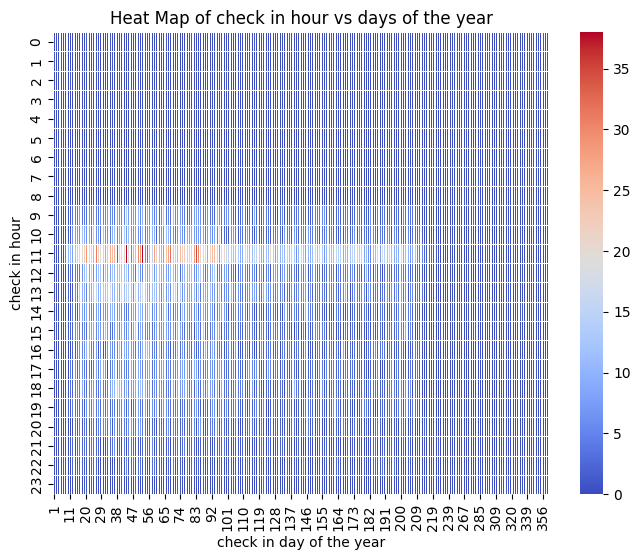

In [ ]:
# heat map of check in day of the year vs check in hour
heat_map_data=hotels.groupby(['check_in_hour','check_in_dayofyear']).size().unstack().fillna(0)
# size, This returns a count of rows in each group (like a value_counts() per group)
# unstack(), This pivots the check_in_hour from rows to columns, so you get a 2D table:
# fillna(0), filling null value with 0

# plot heat map using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(heat_map_data,cmap='coolwarm',cbar=True,linewidth=0.5)
plt.title('Heat Map of check in hour vs days of the year')
plt.xlabel('check in day of the year')
plt.ylabel('check in hour')
plt.show()




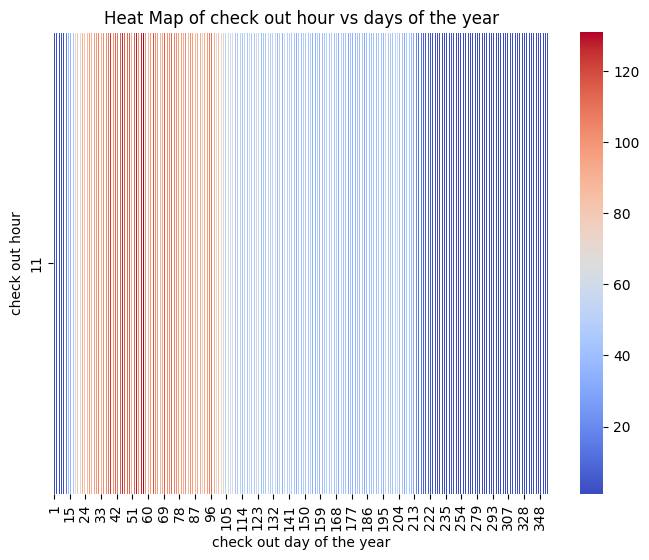

In [ ]:
# heat map of check in day of the year vs check in hour
heat_map_data=hotels.groupby(['check_out_hour','check_out_dayofyear']).size().unstack().fillna(0)


# plot heat map using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(heat_map_data,cmap='coolwarm',cbar=True,linewidth=0.5)
plt.title('Heat Map of check out hour vs days of the year')
plt.xlabel('check out day of the year')
plt.ylabel('check out hour')
plt.show()

In [ ]:
hotels['check_out_hour'].value_counts()

,count
check_out_hour,
11,13772


In [ ]:
# numerical columns from hotels
num_cols=list(hotels.select_dtypes(include='number').columns)
print('num_cols:',num_cols)
# categorical columns from hotels
cat_cols=list(hotels.select_dtypes(include='object').columns)
print('cat_cols:',cat_cols)

num_cols: ['nights', 'rooms', 'hotel_per_room_usd', 'check_in_dayofyear', 'check_in_hour', 'check_out_dayofyear', 'check_out_hour']
cat_cols: ['trip_id', 'hotel_name']


# **Plot**

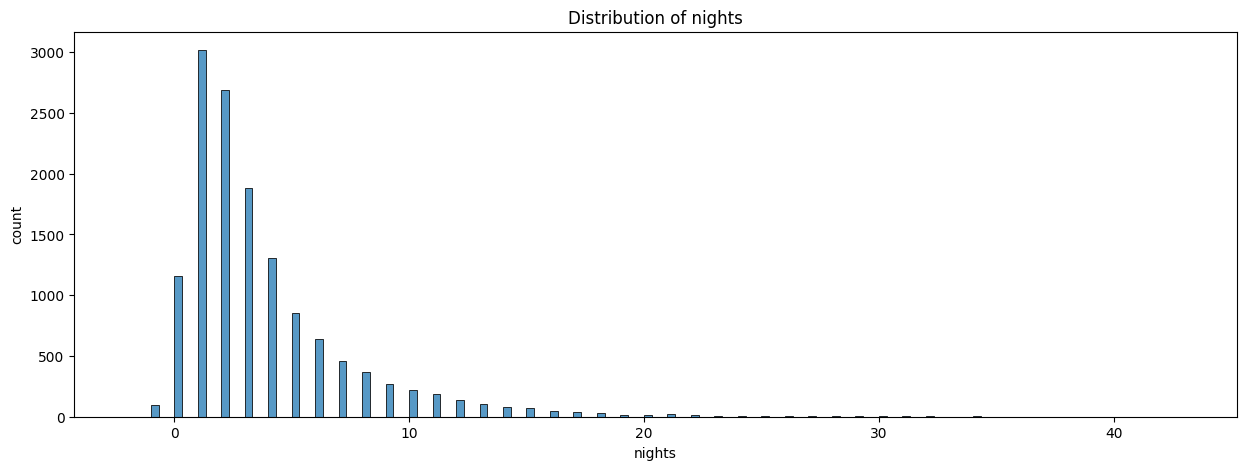

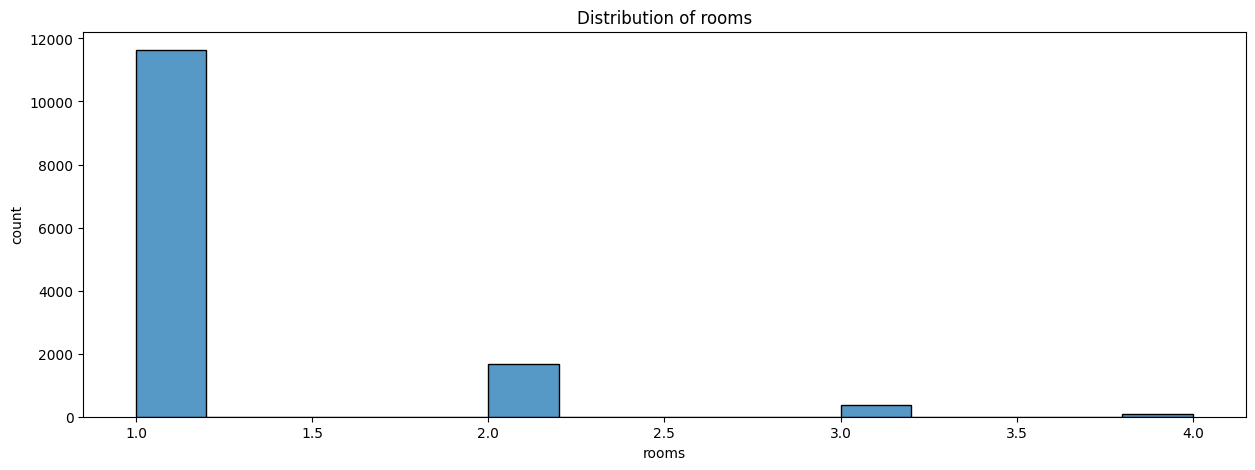

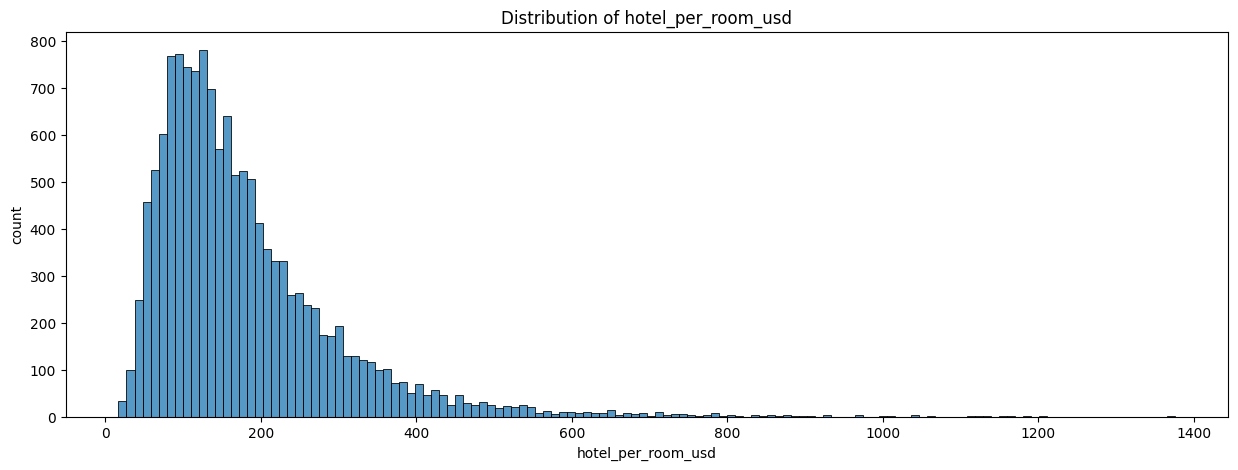

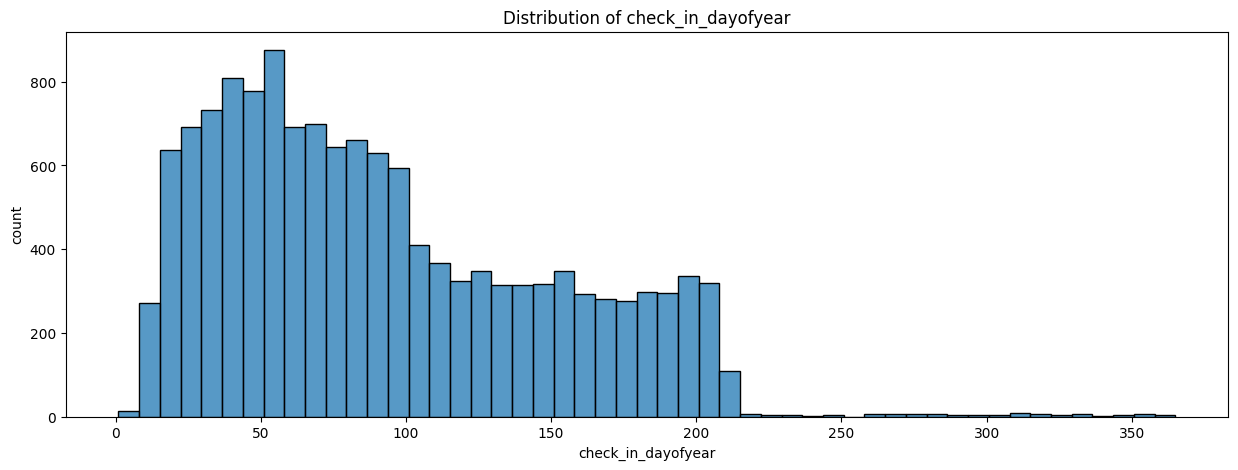

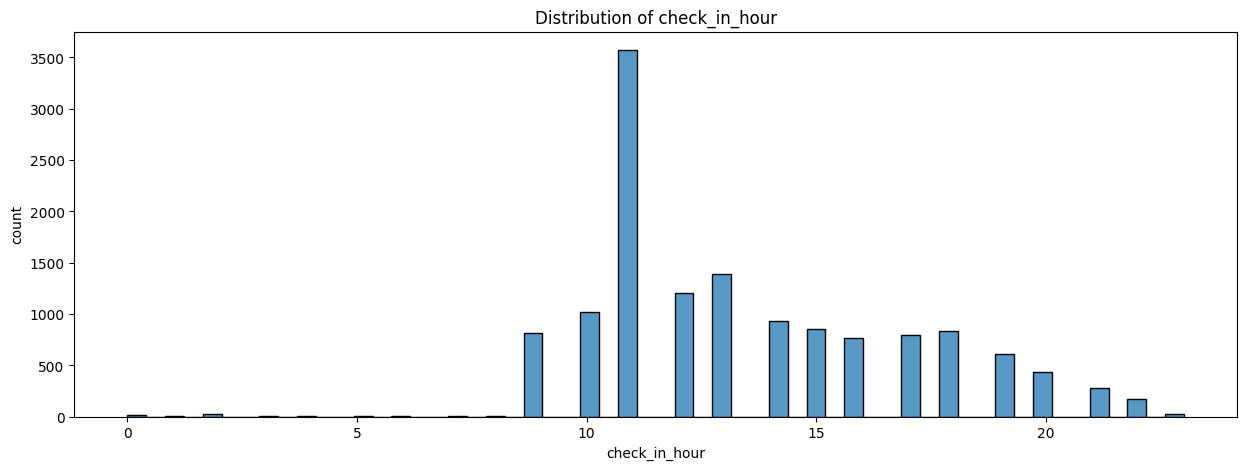

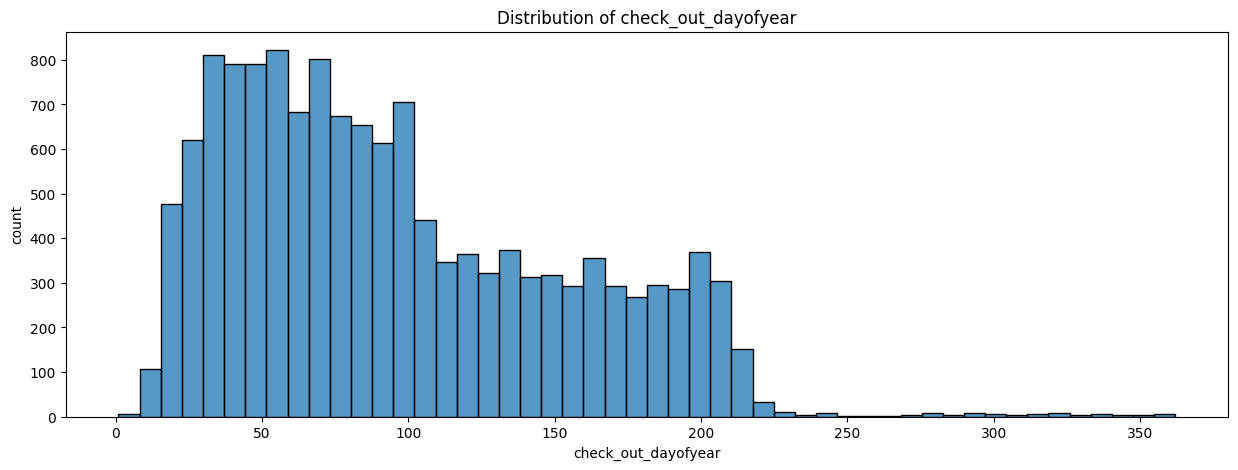

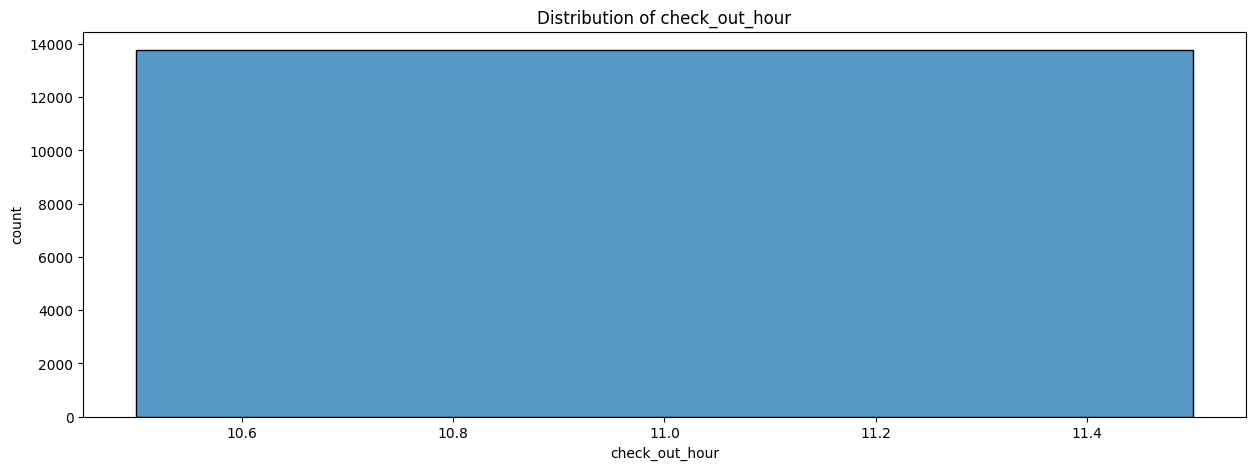

In [ ]:
# Distribution plot of all numeric column
for col in num_cols:
  plt.figure(figsize=(15,5))
  sns.histplot(x=col,data=hotels)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

In [ ]:
hotels['hotel_name'].value_counts()

,count
hotel_name,
Conrad - new york,115
Best Western - new york,115
Accor - new york,111
Aman Resorts - new york,108
Hilton - new york,107
...,...
InterContinental - xi'an,1
Four Seasons - cape town,1
Extended Stay - tucson,1


**Correcting nights**

In [ ]:
hotels_wrong_nights = hotels[hotels['nights']<1].copy()
hotels_wrong_nights
# nights col has many wrong values, need to calculate again, may be all nights are wrong even positive values are some wrongly calculated

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
14,521956-3f5c4243e6ef493cbd7a116263dbded8,Conrad - charlotte,0,1,2023-01-17 16:10:51.690,2023-01-18 11:00:00,97,17,16,18,11
22,540666-7e2dbdb4bdf045299f3a154ad0e4e312,Crowne Plaza - new york,0,1,2023-04-04 14:11:22.965,2023-04-05 11:00:00,422,94,14,95,11
68,676570-ed23a4a861404b84b240ca68b9da1cb3,Radisson - tucson,0,1,2023-04-05 18:52:19.605,2023-04-06 11:00:00,193,95,18,96,11
84,516456-2a5e97d1772641dda4fb5fe66eeaa74e,Best Western - new york,0,1,2023-06-20 17:12:04.095,2023-06-21 11:00:00,228,171,17,172,11
88,592158-b880536527d049a7bbfe8da5596d4243,Marriott - portland,0,1,2023-02-20 13:40:12.810,2023-02-21 11:00:00,137,51,13,52,11
...,...,...,...,...,...,...,...,...,...,...,...
13651,526901-ddb83d0c771f483d93e412e5232d4e36,Radisson - quebec,0,1,2023-01-22 13:18:46.935,2023-01-23 11:00:00,117,22,13,23,11
13669,519725-cd3c41f793b4427e8ea87390fd4cf1b5,Extended Stay - houston,0,1,2023-02-02 12:37:17.175,2023-02-03 11:00:00,63,33,12,34,11
13687,530322-197abc1d374d42dcb3a34f10dd651652,Choice Hotels - quebec,0,1,2023-03-13 17:18:13.770,2023-03-14 11:00:00,200,72,17,73,11
13691,522533-226606028b544eb68edcc774d3055574,InterContinental - los angeles,0,1,2023-02-27 19:40:15.465,2023-02-28 11:00:00,240,58,19,59,11


In [ ]:
# values_counts in termsw of ascending no of nights
hotels['nights'].value_counts()


,count
nights,
1,3018
2,2693
3,1882
4,1309
0,1158
5,856
6,642
7,455
8,370


In [ ]:
# negative nights
hotels[hotels['nights']<0]

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
93,535155-b110abfe2ffa4fd3a6d7ef43084b4a56,Fairmont - seattle,-1,1,2023-02-04 12:58:18.750,2023-02-04 11:00:00,144,35,12,35,11
275,594503-6a3c8903cac74c4d99827c11e29ccee2,Choice Hotels - oklahoma city,-1,1,2023-04-12 12:22:57.855,2023-04-12 11:00:00,262,102,12,102,11
331,514275-349724de73bf4991a7779abe5024b3c0,Banyan Tree - edmonton,-1,2,2023-03-05 15:39:45.180,2023-03-05 11:00:00,246,64,15,64,11
386,550752-6d33b966ac784a74869c45b97644a5d0,Best Western - los angeles,-1,1,2023-02-05 22:15:56.520,2023-02-05 11:00:00,17,36,22,36,11
566,515182-336047f07c0e43729bd04381329f9678,Banyan Tree - quebec,-1,1,2023-03-25 12:18:46.935,2023-03-25 11:00:00,237,84,12,84,11
...,...,...,...,...,...,...,...,...,...,...,...
12332,699411-760a0e67841c4c4f8d22aa88102386ab,Four Seasons - new york,-1,2,2023-05-20 13:46:41.160,2023-05-20 11:00:00,328,140,13,140,11
12738,523273-70681fe70d5c4f0293ccb987f8c4fc4b,Fairmont - san antonio,-1,1,2023-01-20 19:18:09.990,2023-01-20 11:00:00,57,20,19,20,11
13130,544747-5c3a9226b2e8436aaaf2139443c3ac7d,Rosewood - charlotte,-1,1,2023-01-27 21:33:36.180,2023-01-27 11:00:00,378,27,21,27,11
13145,524211-60b3eb9ff20b48fd9011064718a0d007,NH Hotel - ottawa,-1,1,2023-04-29 14:40:43.050,2023-04-29 11:00:00,245,119,14,119,11


In [ ]:
# correcting nights
hotels['new_nights']= (hotels['check_out_time'].dt.floor('D') - hotels['check_in_time'].dt.floor('D')).dt.days
hotels['new_nights'].value_counts()
# still we have -1 nights in new nights column (-1= 26 value, 0=389)


,count
new_nights,
2,3039
3,2466
4,1763
1,1701
5,1185
6,800
7,574
8,396
0,389


In [ ]:
hotels[hotels['new_nights']==-1]
# new_noghts are definitely better than previous one, so i am gonna replace the old one with new one

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour,new_nights
1455,602598-22e0198df949454b92c7ee3f00d103f5,Conrad - charlotte,-1,3,2023-05-02 10:05:37.230,2023-05-01 11:00:00,206,122,10,121,11,-1
2131,518998-bdc08a2047d545d2b2b024aac212a5f6,Extended Stay - new york,-1,1,2023-01-30 11:03:20.565,2023-01-29 11:00:00,244,30,11,29,11,-1
3405,602598-528773b7fe7940f794683d3638a386bd,Radisson - boston,-1,1,2023-02-27 09:22:14.970,2023-02-26 11:00:00,112,58,9,57,11,-1
3671,566875-ec782975633b4a48a5486870fd121934,NH Hotel - new york,-1,1,2023-05-22 09:43:37.065,2023-05-21 11:00:00,52,142,9,141,11,-1
4448,528122-d58ec81e2ab44005a973f08d89905550,Hyatt - memphis,-1,1,2023-03-11 10:38:00.600,2023-03-10 11:00:00,310,70,10,69,11,-1
4512,518324-322ae705590744379ae7f288e2f4b9a9,Extended Stay - houston,-1,1,2023-01-16 11:24:43.875,2023-01-15 11:00:00,140,16,11,15,11,-1
4524,526490-bc1872e571624ae5aac473a046c6e9bb,NH Hotel - chicago,-1,1,2023-02-05 11:15:50.400,2023-02-04 11:00:00,79,36,11,35,11,-1
4807,521335-3cce682f216b42a1a8778811b89cd5c9,Extended Stay - oklahoma city,-1,1,2023-03-11 09:59:40.290,2023-03-10 11:00:00,421,70,9,69,11,-1
4863,596320-67f28818cafd4a1c966362cf6730cd3b,Accor - philadelphia,-1,3,2023-02-21 11:08:20.175,2023-02-20 11:00:00,159,52,11,51,11,-1
5107,532063-c4ec4ea4518841909efb934203f18974,Banyan Tree - nashville,-1,1,2023-01-20 11:53:04.830,2023-01-19 11:00:00,110,20,11,19,11,-1


In [ ]:
hotels['nights']=hotels['new_nights']
hotels.drop('new_nights',axis=1,inplace=True)
hotels.head()

,trip_id,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,check_in_dayofyear,check_in_hour,check_out_dayofyear,check_out_hour
0,582979-5475b9940ee240bf9328a0cc0bc9900c,NH Hotel - ottawa,7,1,2023-03-31 13:32:21.030,2023-04-07 11:00:00,110,90,13,97,11
1,514785-863ac3b4eb984f1eb226d67955623a5d,Choice Hotels - montreal,4,1,2023-06-21 20:06:24.300,2023-06-25 11:00:00,87,172,20,176,11
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,Accor - philadelphia,1,1,2023-04-04 10:43:44.175,2023-04-05 11:00:00,126,94,10,95,11
3,474120-a87f749cf54b4f4ca9262d07080a06b2,Accor - san francisco,5,2,2023-02-02 14:18:11.205,2023-02-07 11:00:00,346,33,14,38,11
4,600395-79e934e3dcf2462587a0beffbebd6783,Marriott - memphis,2,2,2023-04-21 15:58:28.200,2023-04-23 11:00:00,153,111,15,113,11


In [ ]:
hotels['nights'].value_counts() # after adjusting

,count
nights,
2,3039
3,2466
4,1763
1,1701
5,1185
6,800
7,574
8,396
0,389


In [ ]:
# lambda function to fix the few negative noghts
hotels['nights']=hotels['nights'].apply(lambda x: abs(x) if x<0 else x)

hotels.to_csv('filtered_hotels_new.csv',index=False) # we changed the dataset thats why saving it in a new csv file
from google.colab import files
files.download('filtered_hotels_new.csv')
hotels['nights'].value_counts()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,count
nights,
2,3039
3,2466
4,1763
1,1727
5,1185
6,800
7,574
8,396
0,389


<Axes: xlabel='nights'>

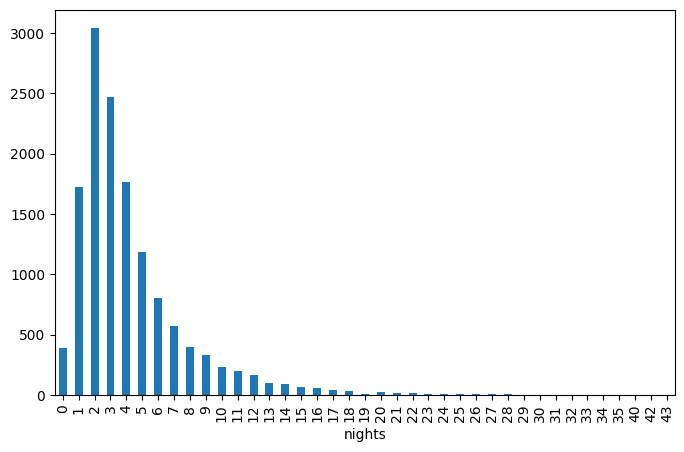

In [ ]:
# plot the night column after editing
hotels['nights'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(8,5))


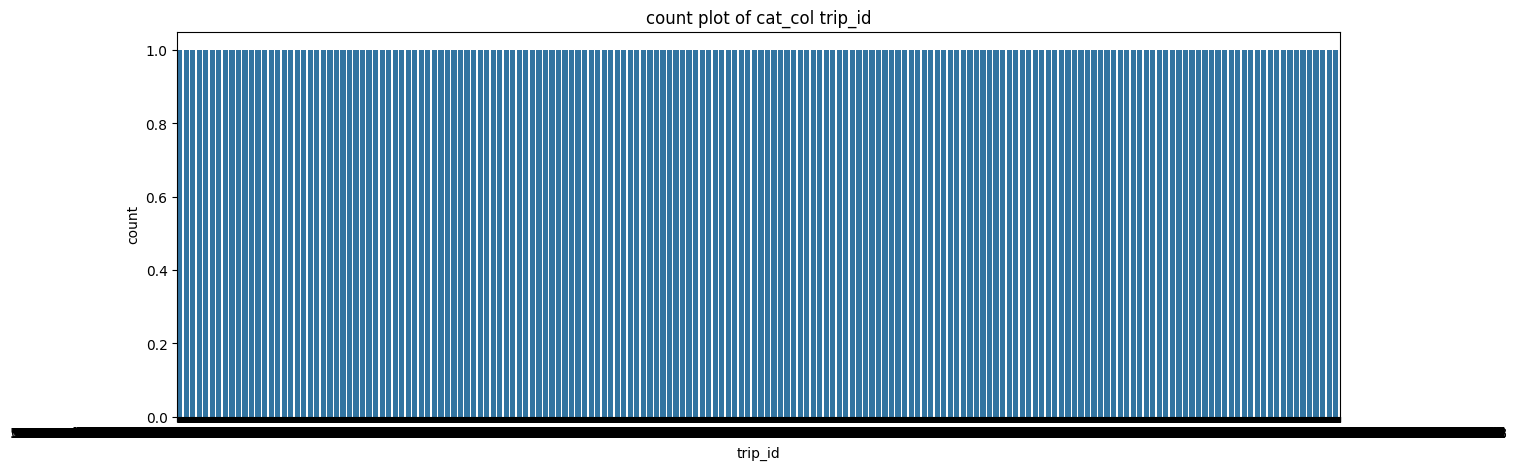

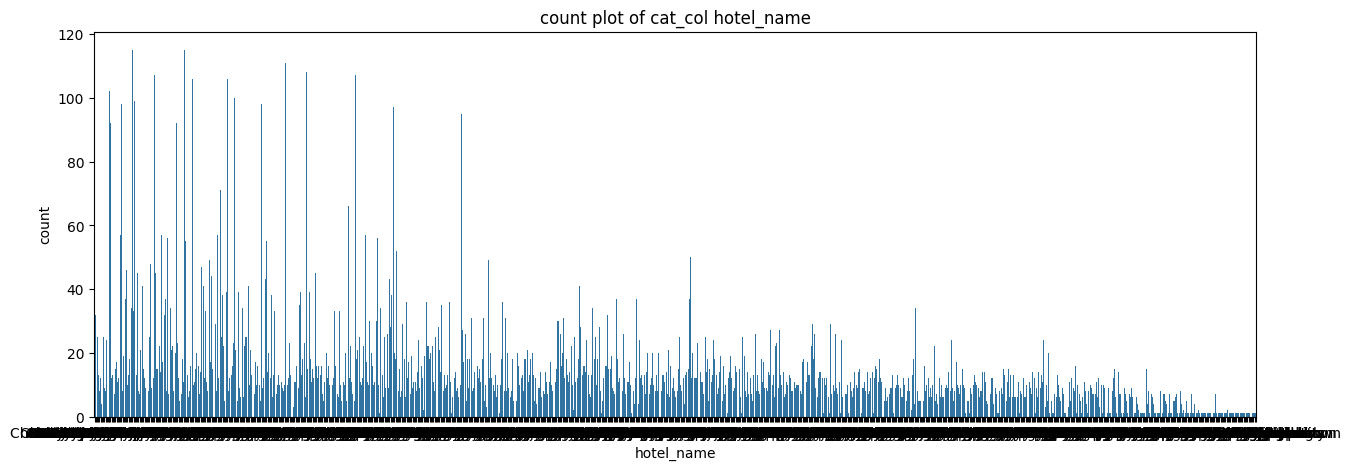

In [ ]:
# count plot of all categorical columns
for col in cat_cols:
  plt.figure(figsize=(15,5))
  sns.countplot(x=col,data=hotels)
  plt.title(f'count plot of cat_col {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

# **Flights**

In [ ]:
# importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Datasets/master_project/'
df=path+'filtered_flights.csv'
flight=pd.read_csv(df)
print('shape',flight.shape)
flight.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shape (13193, 13)


,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd
0,582979-5475b9940ee240bf9328a0cc0bc9900c,RNO,ottawa,YOW,1,True,2023-03-31 07:00:00,2023-04-07 07:00:00,1,Air Canada,45.323,-75.669,657.64
1,514785-863ac3b4eb984f1eb226d67955623a5d,FTW,montreal,YHU,1,False,2023-06-21 15:00:00,NaN,0,Delta Air Lines,45.517,-73.417,221.83
2,588386-233db0f627cf4aaaaeaa9a632daa5ec4,CLE,philadelphia,PHL,1,True,2023-04-04 08:00:00,2023-04-06 08:00:00,2,American Airlines,39.872,-75.241,106.00
3,474120-a87f749cf54b4f4ca9262d07080a06b2,YQB,san francisco,SFO,2,True,2023-02-02 07:00:00,2023-02-07 07:00:00,0,Alaska Airlines,37.619,-122.375,1507.83
4,600395-79e934e3dcf2462587a0beffbebd6783,HOU,memphis,MEM,2,True,2023-04-21 13:00:00,2023-04-24 13:00:00,0,Delta Air Lines,35.042,-89.977,320.19
5,526855-8691d87fc4fe46ae941c577802c2056f,LAX,louisville,LOU,1,True,2023-03-12 08:00:00,2023-03-18 08:00:00,0,Ryanair,38.228,-85.664,492.47
6,486751-e7e65a5bc12243769cf849fa1342aac7,LAX,calgary,YYC,2,True,2023-05-23 09:00:00,2023-05-26 09:00:00,1,Air Canada,51.114,-114.020,687.50
7,548504-2e8f6613291c43cbb9557975f5e273e5,IAH,los angeles,LAX,1,True,2024-02-26 15:00:00,2024-03-12 15:00:00,0,American Airlines,33.942,-118.408,398.73
8,516704-bbf5ac8dfbcf4a0ca5d72da05cdaef8e,LGB,new york,LGA,1,True,2023-07-21 09:00:00,2023-07-25 09:00:00,1,Delta Air Lines,40.640,-73.779,648.54
9,587483-3c7662807a0e4e6db083c6a40f8210d5,MIA,new york,JFK,1,True,2023-02-17 07:00:00,2023-02-19 07:00:00,1,Finnair,40.640,-73.779,307.07


In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13193 entries, 0 to 13192
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  13193 non-null  object 
 1   origin_airport           13193 non-null  object 
 2   destination              13193 non-null  object 
 3   destination_airport      13193 non-null  object 
 4   seats                    13193 non-null  int64  
 5   return_flight_booked     13193 non-null  bool   
 6   departure_time           13193 non-null  object 
 7   return_time              12620 non-null  object 
 8   checked_bags             13193 non-null  int64  
 9   trip_airline             13193 non-null  object 
 10  destination_airport_lat  13193 non-null  float64
 11  destination_airport_lon  13193 non-null  float64
 12  base_fare_usd            13193 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [ ]:
flight.describe()


,seats,checked_bags,destination_airport_lat,destination_airport_lon,base_fare_usd
count,13193.000000,13193.000000,13193.000000,13193.000000,13193.000000
mean,1.200106,0.584477,38.708329,-90.471100,489.114071
std,0.552416,0.653633,6.642478,29.068945,675.795966
min,1.000000,0.000000,-37.008000,-157.927000,2.410000
25%,1.000000,0.000000,33.942000,-112.383000,198.600000
50%,1.000000,1.000000,39.872000,-87.752000,377.820000
75%,1.000000,1.000000,42.409000,-75.669000,590.590000
max,8.000000,8.000000,55.972000,174.792000,14466.330000


In [ ]:
flight.duplicated().sum()

np.int64(0)

In [ ]:
# convert departure_time and return_time into date_time
flight['departure_time']=pd.to_datetime(flight['departure_time'])
flight['return_time']=pd.to_datetime(flight['return_time'])
print(flight[['departure_time','return_time']])

           departure_time         return_time
0     2023-03-31 07:00:00 2023-04-07 07:00:00
1     2023-06-21 15:00:00                 NaT
2     2023-04-04 08:00:00 2023-04-06 08:00:00
3     2023-02-02 07:00:00 2023-02-07 07:00:00
4     2023-04-21 13:00:00 2023-04-24 13:00:00
...                   ...                 ...
13188 2023-02-23 11:00:00 2023-02-27 11:00:00
13189 2023-04-02 10:00:00 2023-04-08 10:00:00
13190 2024-01-23 19:00:00 2024-02-06 19:00:00
13191 2023-04-13 07:00:00 2023-04-16 07:00:00
13192 2023-07-05 12:00:00 2023-07-12 12:00:00

[13193 rows x 2 columns]


In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13193 entries, 0 to 13192
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  13193 non-null  object        
 1   origin_airport           13193 non-null  object        
 2   destination              13193 non-null  object        
 3   destination_airport      13193 non-null  object        
 4   seats                    13193 non-null  int64         
 5   return_flight_booked     13193 non-null  bool          
 6   departure_time           13193 non-null  datetime64[ns]
 7   return_time              12620 non-null  datetime64[ns]
 8   checked_bags             13193 non-null  int64         
 9   trip_airline             13193 non-null  object        
 10  destination_airport_lat  13193 non-null  float64       
 11  destination_airport_lon  13193 non-null  float64       
 12  base_fare_usd            13193 n

# **Plot**

In [ ]:
# numerical columns of flights
num_cols=list(flight.select_dtypes(include='number').columns)
print('num_cols:',num_cols)
# categorical columns of flights
cat_cols=list(flight.select_dtypes(include='object').columns)
print('cat_cols:',cat_cols)



num_cols: ['seats', 'checked_bags', 'destination_airport_lat', 'destination_airport_lon', 'base_fare_usd']
cat_cols: ['trip_id', 'origin_airport', 'destination', 'destination_airport', 'trip_airline']


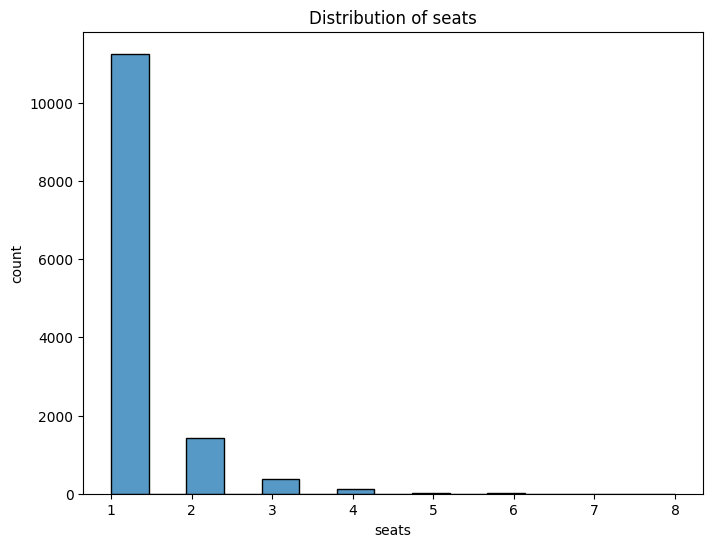

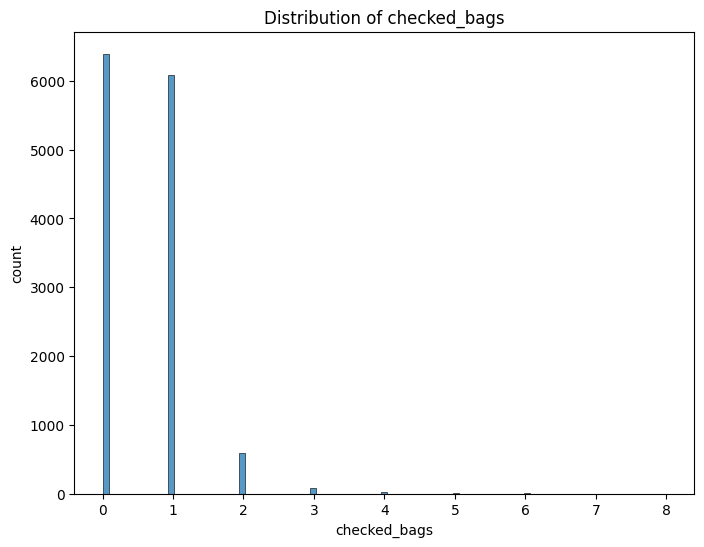

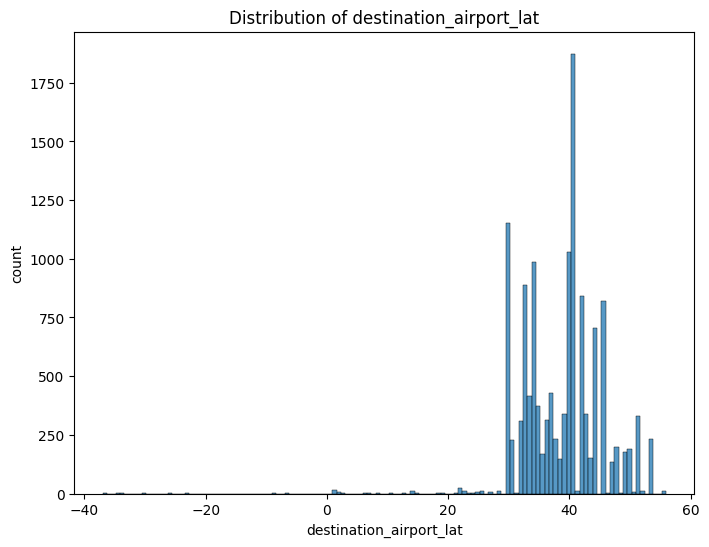

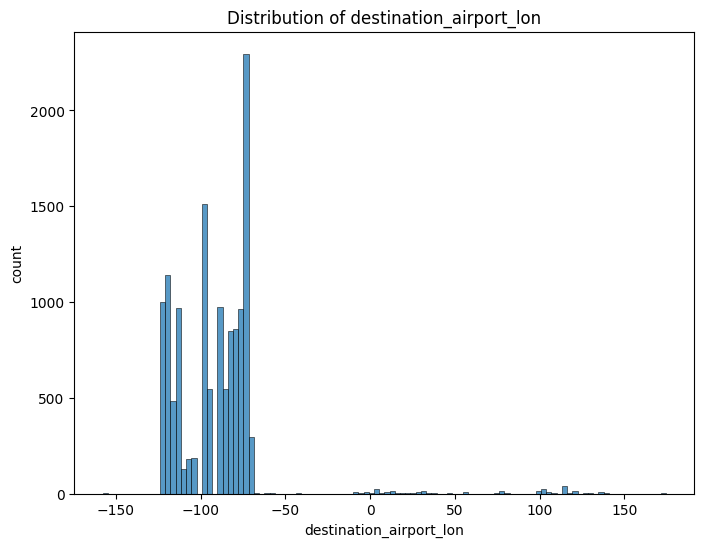

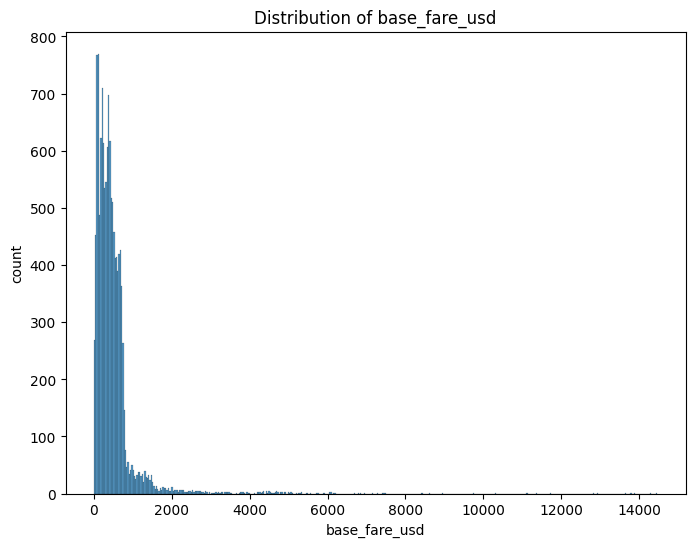

In [ ]:
# distribution plot of all numeric column in flights
for col in num_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(x=col,data=flight)

  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

In [ ]:
flight['origin_airport'].value_counts()

,count
origin_airport,
LGA,835
JFK,776
LAX,698
DAL,265
YYC,233
...,...
SKA,12
POB,11
GEG,9


In [ ]:
flight['destination'].value_counts()

,count
destination,
new york,1868
los angeles,983
toronto,707
chicago,677
houston,545
...,...
punta cana,1
pune,1
nice,1


In [ ]:
flight['destination_airport'].value_counts()

,count
destination_airport,
JFK,944
LGA,924
LSQ,514
LAX,469
DAL,350
...,...
THF,1
LTN,1
AUH,1


In [ ]:
flight['return_flight_booked'].value_counts(normalize=True)

,proportion
return_flight_booked,
True,0.956568
False,0.043432


<Axes: xlabel='base_fare_usd', ylabel='Density'>

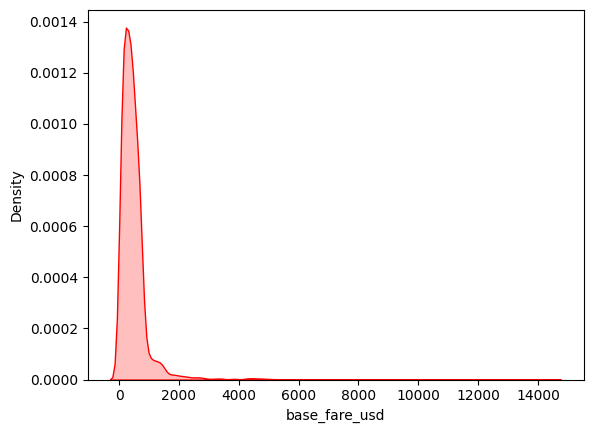

In [ ]:
sns.kdeplot(flight['base_fare_usd'],fill=True,color='red')
# most of the base_fare_used in range 0-2000


In [ ]:
flight[flight['base_fare_usd']<=0]

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd


In [ ]:
flight[flight['base_fare_usd']>3000]

,trip_id,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd
295,565827-22aa93ceeea24a01a41e5e1a50ceff9b,BNA,dubai,DXB,2,True,2023-12-23 08:00:00,2024-01-02 08:00:00,1,Emirates,25.255,55.364,4572.97
296,549058-8b09b587ecee48d19e2cc451a97238b8,YKZ,guangzhou,CAN,2,True,2024-07-16 07:00:00,2024-07-29 07:00:00,1,China Southern Airlines,23.184,113.266,4194.38
596,591063-b13a35b8501d4e2b913736e2ee1ed93c,YTZ,kuala lumpur,KUL,2,True,2023-12-08 07:00:00,2023-12-19 07:00:00,1,American Airlines,2.746,101.710,5769.63
720,646933-59c510529f6f4e3585bdb9b2e76c68e7,JFK,san francisco,SFO,4,True,2023-07-22 12:00:00,2023-07-25 12:00:00,1,United Airlines,37.619,-122.375,3099.71
745,373489-6dffc799005146528b75488c2529afbe,ICT,osaka,ITM,4,True,2024-02-09 09:00:00,2024-02-22 09:00:00,3,Japan Airlines,34.785,135.438,7451.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,535595-6640f8ff7ef0443691022cc60d6ef860,ATL,delhi,DEL,5,True,2023-10-30 10:00:00,2023-11-14 10:00:00,4,Lufthansa,28.566,77.103,11356.96
12969,528743-c62add2a7d164c03ad97fbc78850e2fa,RIV,delhi,DEL,3,True,2023-09-19 17:00:00,2023-10-10 17:00:00,2,Malaysia Airlines,28.566,77.103,6966.58
13037,584115-756d51f6f8a148b389c0836c3b71fac5,IAH,taipei,TPE,2,True,2024-03-14 19:00:00,2024-03-28 19:00:00,1,China Southern Airlines,25.069,121.552,4721.63
13154,560739-b91cdfb66dee4b618b2c383cebcc4300,LCK,tokyo,HND,2,True,2024-01-17 15:00:00,2024-01-31 15:00:00,1,All Nippon Airways,35.765,140.386,3825.76


# **Sessions**

In [ ]:
# importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Datasets/master_project/'
df=path+'filtered_sessions.csv'
session=pd.read_csv(df)
print('shape',session.shape)
session.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shape (47436, 13)


,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation
0,536782-40ea451ff53841b296036272519d4e7e,536782,NaN,2023-01-18 19:33:00,2023-01-18 19:34:20,False,False,NaN,NaN,False,False,11,False
1,570600-1913f4dc10e445e59765e73588e68dfd,570600,NaN,2023-04-28 21:24:00,2023-04-28 21:24:16,False,False,NaN,NaN,False,False,2,False
2,511055-89aed43aef924e97a0b4cadff654328f,511055,511055-57ed6923358d47a0a3be86eaf8128ece,2023-02-02 20:49:00,2023-02-02 20:52:39,True,False,0.1,NaN,True,True,30,False
3,677209-77c593f41bd04228b89a55b3a9d34141,677209,NaN,2023-06-01 21:20:00,2023-06-01 21:20:24,False,False,NaN,NaN,False,False,3,False
4,546867-c1b3888def70494a893b025bfa3a1b80,546867,NaN,2023-03-04 20:38:00,2023-03-04 20:39:08,False,False,NaN,NaN,False,False,9,False
5,517370-f0139da79e55443faf03377af803bef8,517370,NaN,2023-04-03 20:10:00,2023-04-03 20:10:54,False,True,NaN,0.15,False,False,7,False
6,513338-11ae5ab90d004645911e986a3896ba6e,513338,513338-5a599797caca40e993acde42f4df738b,2023-05-15 09:49:00,2023-05-15 09:51:15,False,False,NaN,NaN,True,True,18,False
7,545264-d4497999693c48e1a5967bb759464401,545264,NaN,2023-02-27 23:32:00,2023-02-27 23:32:37,False,False,NaN,NaN,False,False,5,False
8,539304-a6bbc867635747709af92bc743d6ebd5,539304,NaN,2023-06-23 19:56:00,2023-06-23 19:57:39,False,False,NaN,NaN,False,False,13,False
9,544747-b9cd59fe314d48249366411bc1ad124f,544747,NaN,2023-02-19 11:00:00,2023-02-19 11:02:48,False,True,NaN,0.10,False,False,22,False


In [ ]:
# prompt: return the session table as session_trip without the Nan of trip_id column

session_trip = session[session['trip_id'].notna()]
print(session_trip.describe())
session_trip.head()


             user_id                  session_start  \
count   16066.000000                          16066   
mean   544650.953193  2023-03-28 05:56:00.210693376   
min     94883.000000            2023-01-05 00:39:00   
25%    518631.500000            2023-02-09 13:18:45   
50%    539905.500000            2023-03-16 17:58:30   
75%    571643.000000            2023-05-11 05:25:15   
max    811077.000000            2023-07-28 19:58:52   
std     61695.027789                            NaN   

                         session_end  flight_discount_amount  \
count                          16066             2298.000000   
mean   2023-03-28 06:02:27.520463104                0.141101   
min              2023-01-05 00:42:05                0.050000   
25%    2023-02-09 13:21:22.750000128                0.100000   
50%              2023-03-16 18:01:41                0.100000   
75%    2023-05-11 05:28:09.750000128                0.200000   
max              2023-07-28 20:08:52                0.60

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation
2,511055-89aed43aef924e97a0b4cadff654328f,511055,511055-57ed6923358d47a0a3be86eaf8128ece,2023-02-02 20:49:00,2023-02-02 20:52:39,True,False,0.1,NaN,True,True,30,False
6,513338-11ae5ab90d004645911e986a3896ba6e,513338,513338-5a599797caca40e993acde42f4df738b,2023-05-15 09:49:00,2023-05-15 09:51:15,False,False,NaN,NaN,True,True,18,False
13,498357-c67547a05aeb404f99c38790f2ed3c5d,498357,498357-ba7cfeee8c1342ff85cdbf912a4996f3,2023-02-28 14:04:00,2023-02-28 14:06:28,True,False,0.2,NaN,True,True,20,False
14,545226-55cb5129028c42dabb651f4316e8010c,545226,545226-b0b0753688c3499b957ad34837b78893,2023-07-01 20:31:00,2023-07-01 20:33:40,False,False,NaN,NaN,False,True,22,False
17,527132-41df3493b2d046589b20d7fd63083004,527132,527132-adf0cb76e22b486eb35f510a716a5f09,2023-03-30 19:09:00,2023-03-30 19:11:00,False,False,NaN,NaN,True,True,16,False


In [ ]:
# prompt: value_counts of flight_discount, hotel_discount,flight_booked,hotel_booked,cancellation from session_trip dataset

# Assuming 'session_trip' DataFrame is already loaded as shown in the provided code.

cols_to_analyze = ['flight_discount', 'hotel_discount', 'flight_booked', 'hotel_booked', 'cancellation']

for col in cols_to_analyze:
  if col in session_trip.columns:
    print(f"Value counts for {col}:\n{session_trip[col].value_counts(normalize=True)}\n")
  else:
    print(f"Column '{col}' not found in the 'session_trip' DataFrame.")


Value counts for flight_discount:
flight_discount
False    0.820304
True     0.179696
Name: proportion, dtype: float64

Value counts for hotel_discount:
hotel_discount
False    0.829391
True     0.170609
Name: proportion, dtype: float64

Value counts for flight_booked:
flight_booked
True     0.857401
False    0.142599
Name: proportion, dtype: float64

Value counts for hotel_booked:
hotel_booked
True     0.893626
False    0.106374
Name: proportion, dtype: float64

Value counts for cancellation:
cancellation
False    0.963339
True     0.036661
Name: proportion, dtype: float64



In [ ]:
# prompt: value counts when flight_booked and hotel_booked are true, both are false, and when one of them true and false

# Assuming 'session_trip' DataFrame is already loaded as shown in the provided code.

# Create a new column 'booking_status' based on 'flight_booked' and 'hotel_booked' columns
session_trip['booking_status'] = session_trip.apply(lambda row: 'Both True' if row['flight_booked'] and row['hotel_booked'] else ('Both False' if not row['flight_booked'] and not row['hotel_booked'] else 'One True/One False'), axis=1)

# Calculate the value counts for the 'booking_status' column
booking_status_counts = session_trip['booking_status'].value_counts(normalize=True)
booking_status_counts


<ipython-input-74-d7c0abf57b9e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_trip['booking_status'] = session_trip.apply(lambda row: 'Both True' if row['flight_booked'] and row['hotel_booked'] else ('Both False' if not row['flight_booked'] and not row['hotel_booked'] else 'One True/One False'), axis=1)


,proportion
booking_status,
Both True,0.751027
One True/One False,0.248973


In [ ]:
session.info()
# out of 47436 sessions id, only 16066 have trip id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47436 entries, 0 to 47435
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              47436 non-null  object 
 1   user_id                 47436 non-null  int64  
 2   trip_id                 16066 non-null  object 
 3   session_start           47436 non-null  object 
 4   session_end             47436 non-null  object 
 5   flight_discount         47436 non-null  bool   
 6   hotel_discount          47436 non-null  bool   
 7   flight_discount_amount  7971 non-null   float64
 8   hotel_discount_amount   6015 non-null   float64
 9   flight_booked           47436 non-null  bool   
 10  hotel_booked            47436 non-null  bool   
 11  page_clicks             47436 non-null  int64  
 12  cancellation            47436 non-null  bool   
dtypes: bool(5), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
session.describe()
# max flight discount 60%, min 5%
# max hotel discount 45%, min 5%
# max page clicks 566, min 1
# 33.86 % (16066/47436) trip_id generated among all session_id

,user_id,flight_discount_amount,hotel_discount_amount,page_clicks
count,47436.000000,7971.000000,6015.000000,47436.000000
mean,547497.276246,0.139725,0.112211,17.598153
std,63772.497096,0.083942,0.062231,21.533788
min,94883.000000,0.050000,0.050000,1.000000
25%,519383.000000,0.100000,0.050000,6.000000
50%,542095.000000,0.100000,0.100000,13.000000
75%,575823.000000,0.200000,0.150000,22.000000
max,844489.000000,0.600000,0.450000,566.000000


In [ ]:
session.duplicated().sum()

np.int64(0)

In [ ]:
# convert session_start and session_end into date_time

import pandas as pd
# Convert 'session_start' and 'session_end' columns to datetime objects
session['session_start'] = pd.to_datetime(session['session_start'],format='mixed', errors='coerce')
session['session_end'] = pd.to_datetime(session['session_end'],format='mixed', errors='coerce')


In [ ]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47436 entries, 0 to 47435
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              47436 non-null  object        
 1   user_id                 47436 non-null  int64         
 2   trip_id                 16066 non-null  object        
 3   session_start           47436 non-null  datetime64[ns]
 4   session_end             47436 non-null  datetime64[ns]
 5   flight_discount         47436 non-null  bool          
 6   hotel_discount          47436 non-null  bool          
 7   flight_discount_amount  7971 non-null   float64       
 8   hotel_discount_amount   6015 non-null   float64       
 9   flight_booked           47436 non-null  bool          
 10  hotel_booked            47436 non-null  bool          
 11  page_clicks             47436 non-null  int64         
 12  cancellation            47436 non-null  bool  

In [ ]:
# categorical column and numerical column from session

# Assuming 'session' DataFrame is already loaded as in the provided code.

# Identify categorical columns
cat_cols = session.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns
num_cols = session.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", cat_cols)
print("\nNumerical columns:", num_cols)


Categorical columns: ['session_id', 'trip_id']

Numerical columns: ['user_id', 'flight_discount_amount', 'hotel_discount_amount', 'page_clicks']


# **Plots**

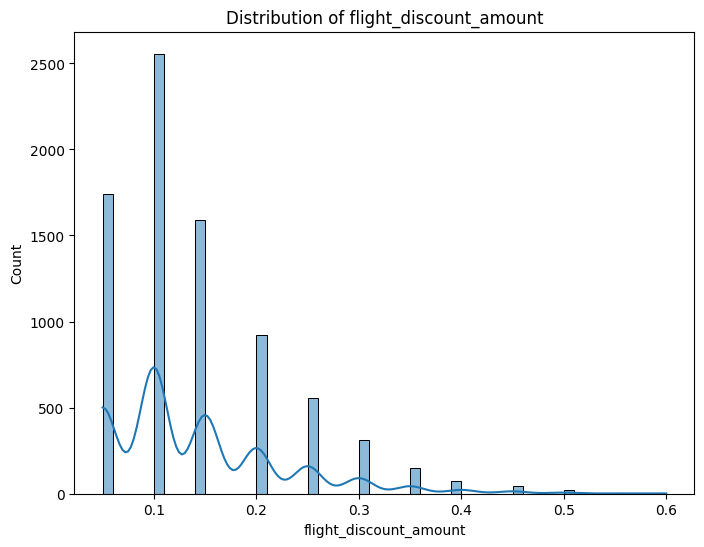

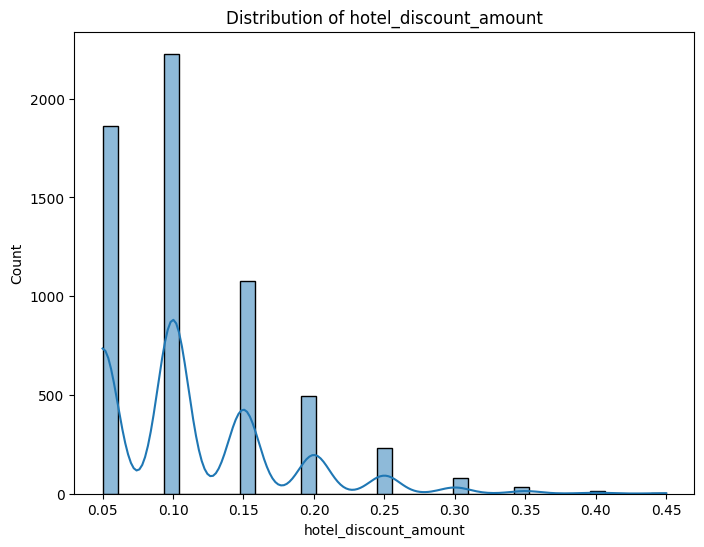

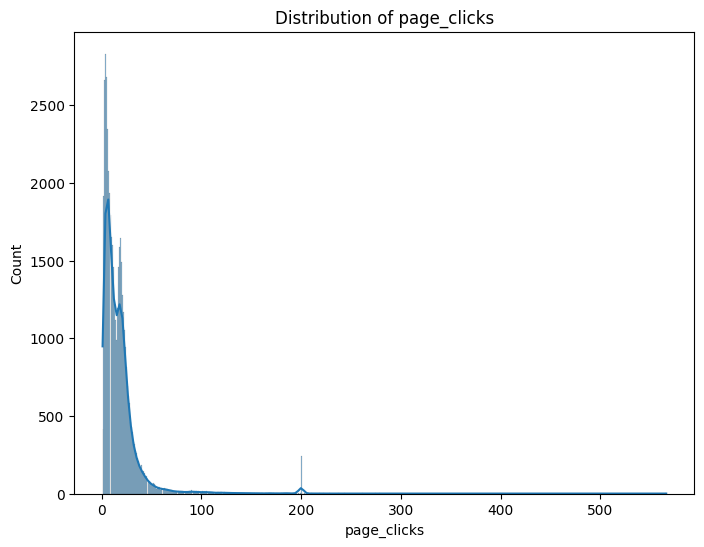

In [ ]:
# prompt: generate distribution plot with all numerical column except user_id column

import matplotlib.pyplot as plt
# Assuming 'users' DataFrame is already loaded as in the provided code.

# Identify numerical columns excluding 'user_id'
num_cols = [col for col in session.select_dtypes(include='number').columns if col != 'user_id']

# Create distribution plots for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=col, data=session, kde=True)  # Added kde=True for density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [ ]:
# count the trip_id when the cancellation column has false and true value, then the percentage

# Assuming 'session' DataFrame is already loaded as in the provided code.

# Count trip_ids where cancellation is False
false_cancellations = session[session['cancellation'] == False]['trip_id'].count()

# Count trip_ids where cancellation is True
true_cancellations = session[session['cancellation'] == True]['trip_id'].count()

# Calculate the total number of trips
total_trips = false_cancellations + true_cancellations

# Calculate the percentage of false cancellations
false_percentage = (false_cancellations / total_trips) * 100

# Calculate the percentage of true cancellations
true_percentage = (true_cancellations / total_trips) * 100

print(f"Number of trips with cancellation = False: {false_cancellations}")
print(f"Number of trips with cancellation = True: {true_cancellations}")
print(f"Percentage of trips with cancellation = False: {false_percentage:.2f}%")
print(f"Percentage of trips with cancellation = True: {true_percentage:.2f}%")


Number of trips with cancellation = False: 15477
Number of trips with cancellation = True: 589
Percentage of trips with cancellation = False: 96.33%
Percentage of trips with cancellation = True: 3.67%


session shows that cancellation true  is 1.2%, while trip cancellation true is 3.6% . 3.6% will be the correct one, where the actual trips were cancelled.


Normalized value counts for flight_discount:
flight_discount
False    0.819546
True     0.180454
Name: proportion, dtype: float64



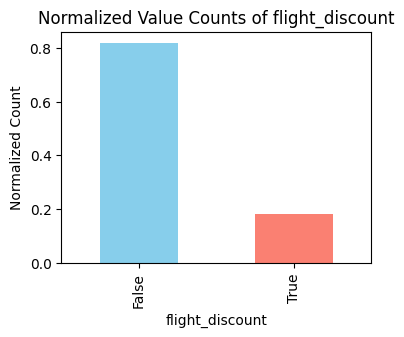

Normalized value counts for hotel_discount:
hotel_discount
False    0.860781
True     0.139219
Name: proportion, dtype: float64



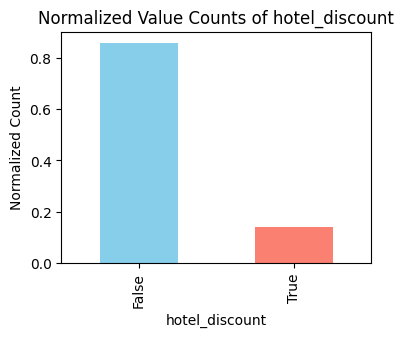

Normalized value counts for flight_booked:
flight_booked
False    0.709609
True     0.290391
Name: proportion, dtype: float64



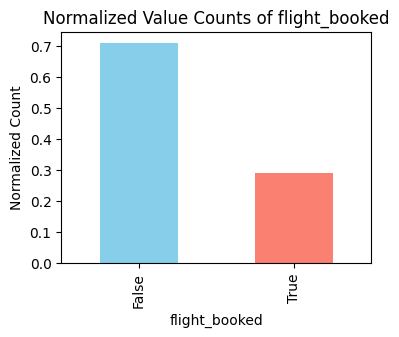

Normalized value counts for hotel_booked:
hotel_booked
False    0.69734
True     0.30266
Name: proportion, dtype: float64



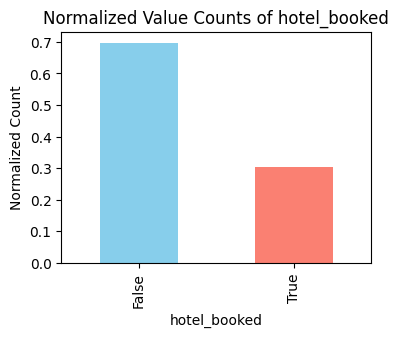

Normalized value counts for cancellation:
cancellation
False    0.987583
True     0.012417
Name: proportion, dtype: float64



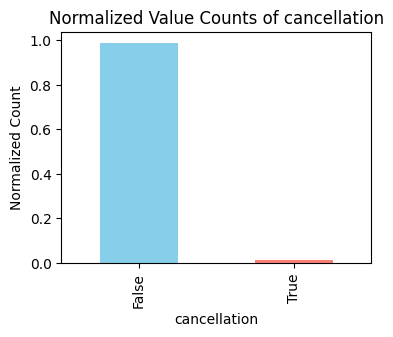

In [ ]:
# normalized value counts and plot of all bool typer column in sessions

import matplotlib.pyplot as plt
# Assuming 'session' DataFrame is already loaded as in the provided code.

# Identify boolean columns
bool_cols = session.select_dtypes(include=['bool']).columns

# Iterate through boolean columns
for col in bool_cols:
    # Calculate normalized value counts
    normalized_counts = session[col].value_counts(normalize=True)
    print(f"Normalized value counts for {col}:\n{normalized_counts}\n")

    # Create a plot
    plt.figure(figsize=(4, 3))
    normalized_counts.plot(kind='bar', color=['skyblue','salmon'])
    plt.title(f'Normalized Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Normalized Count')
    plt.show()
